**Fully Connected Neural Network**

# **Importing Libraries**

In [1]:
# Sequential API to create models
from keras.models import Sequential

#Components to create a model
from keras.layers import Dense, Input

# Stochastic Gradient Descent Algorithm
from keras.optimizers import SGD

# Keras already hosted MNIST dataset for us
from keras.datasets import mnist

# An Keras utility to binarize integers
from keras.utils import to_categorical

# An Keras utility to visualize model graph
from keras.utils import plot_model

# Another ML library that has many utilities for image operation
import skimage

# Here we will use only two of it's utilities
from skimage.io import imshow

# Another python library for plotting things
import matplotlib.pyplot as plt

# Another python library to manipulate vectors, matrices, arrays etc.
import numpy as np

# **Hyperparameters**

In [2]:
# Whole dataset splits into batches
batch_size = 128

# Number of labels of our dataset
nb_classes = 10

# Number of times we want to train the model
nb_epoch = 10

# **Load Data**

In [3]:
# Load MNISR dataset
# Data split into two sub-set: Training and Testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Data Statistics**

In [4]:
print("Number of Training Samples:", len(X_train))
print("Number of Associated Labels:", len(y_train))

Number of Training Samples: 60000
Number of Associated Labels: 60000


In [5]:
print("Shape of Training Data:",X_train.shape)

Shape of Training Data: (60000, 28, 28)


(Samples, m,n)  
28*28 is the dimension of each sample image.


In [6]:
print("Data Type of Training Samples:",X_train.dtype)

Data Type of Training Samples: uint8


unsigned integer type data

In [7]:
print("Data Type of Training Labels:",y_train.dtype)

Data Type of Training Labels: uint8


In [8]:
print("Shape of Training Labels:",y_train.shape)

Shape of Training Labels: (60000,)


Label is a single integer value for each image.

In [9]:
print("Number of Testing Samples:", len(X_test))
print("Number of Associated Labels:", len(y_test))

Number of Testing Samples: 10000
Number of Associated Labels: 10000


In [10]:
print("Shape of Test Data:",X_test.shape)

Shape of Test Data: (10000, 28, 28)


In [11]:
print("Data Type of Test Data:",X_test.dtype)

Data Type of Test Data: uint8


In [12]:
print("Shape of Test Labels:",y_test.shape)

Shape of Test Labels: (10000,)


(10000,) -> We can consider this as 1D vector of 10000 samples

# **Visualize Data**

In [13]:
# A single sample among 60,000 samples
X_train[0].shape

(28, 28)

In [14]:
a_random_sample = X_train[0]
# Pixel values of the sample
a_random_sample

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

/tmp/ipython-input-15-1069867820.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(a_random_sample)


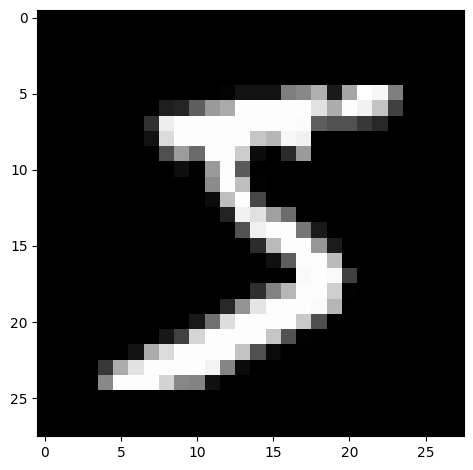

In [15]:
# Displaying it
imshow(a_random_sample)

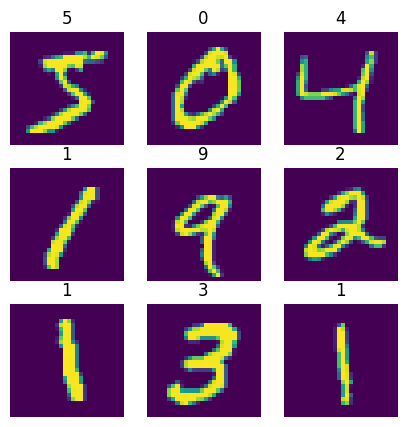

In [16]:
# Plotting 9 image from the dataset
# Define the size of the figure
plt.figure(figsize=(5, 5))

for i in range(9): # i starts from 0 and ends at 8
  ax = plt.subplot(3, 3, i + 1)

  #Get a sample at index i
  an_image = X_train[i]

  #Display the image
  plt.imshow(an_image)

  #Display the label of the sample as title
  plt.title(int(y_train[i])) #type casting to integer

  plt.axis("off")

One neuron takes only one value. Cannot take matrix as input.  
So, every neuron will take a pixel value from the image grid of ```28*28 ```  
So, number of neuron required is = 28*28 = 784 at the input layer.  
We need the convert the image into 1D values for giving input to the model.

# **Reshape and Flatten Data**

In [17]:
print("Shape of Training Data:",X_train.shape)
print("Shape of Training Sample:",X_train[0].shape)

Shape of Training Data: (60000, 28, 28)
Shape of Training Sample: (28, 28)


In [18]:
#Get a sample image
an_image = X_train[0]

print("Shape of the sample image:",an_image.shape)

# Define new shape and flatten the image
new_shape = 28*28
flattened_image = an_image.reshape(new_shape)

print("Shape of the flattened image:",flattened_image.shape)

Shape of the sample image: (28, 28)
Shape of the flattened image: (784,)


1D vector with 784 values

In [19]:
# Flatten the whole training data

print("Previous shape of X_train:",X_train.shape)

X_train = X_train.reshape(60000,784) #(number_images, to_the_size_we_want)

print("New shape of X_train:",X_train.shape)

Previous shape of X_train: (60000, 28, 28)
New shape of X_train: (60000, 784)


In [20]:
# Flatten the test data
print("Previous shape of X_test:",X_test.shape)

X_test = X_test.reshape(10000, 784)

print("New shape of X_test:",X_test.shape)

Previous shape of X_test: (10000, 28, 28)
New shape of X_test: (10000, 784)


In [21]:
print("Previous DataType of Train and Test samples:")
print(X_train.dtype)
print(X_test.dtype)

# Change data type of train and test data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("New DataType of Train and Test samples:")
print(X_train.dtype)
print(X_test.dtype)

Previous DataType of Train and Test samples:
uint8
uint8
New DataType of Train and Test samples:
float32
float32


We cannont perform rescaling without float data.

# **Rescaling Data**

Scaling the pixel values to the range (0,1)

In [22]:
# Get a random sample
a_sample = X_train[0]

print("Min value of the sample:",a_sample.min())
print("Max value of the sample:",a_sample.max())

Min value of the sample: 0.0
Max value of the sample: 255.0


range 0-255

In [23]:
# Devide each value in train and test data by 255
X_train = X_train/255
X_test = X_test/255

In [24]:
# Get a random sample
a_sample = X_train[0]

print("Min value of the sample:",a_sample.min())
print("Max value of the sample:",a_sample.max())

Min value of the sample: 0.0
Max value of the sample: 1.0


range 0-1

# **Binarize Labels**

In [25]:
# Display the training Labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
# Shape
y_train.shape

(60000,)

In [27]:
# A random array
input_array = np.array([0,1, 2, 3, 4, 5, 6, 7, 8, 9])
print(input_array)
print("Input array shape:",input_array.shape)

# Apply to_categorical to the random array
output = to_categorical(input_array,num_classes=10)

print(output)
print("Output shape:",output.shape)

[0 1 2 3 4 5 6 7 8 9]
Input array shape: (10,)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Output shape: (10, 10)


Every number will be represented by unique binary sequence of 0 and 1.  
This is important because the activation function at the output layer gives output in 1 or 0. So, we need to compare them with labels in ones and zeroes

In [28]:
# Apply to_categorical to train labels
Y_train = to_categorical(y_train,nb_classes)

# Apply to_categorical to test labels
Y_test = to_categorical(y_test,nb_classes)

# **Define Model**

In [29]:
# Multilayer Perception model

#We want to create a sequentially stacked model using Keras Sequenctial API
model = Sequential()

# Set up input layer
model.add(Input(shape=(784,)))

# 1st layer in the model to receive inputs
model.add(Dense(784, activation='relu'))

# Hidden layer
model.add(Dense(625, activation='relu')) #625 is taken arbitarily

# Output layer
model.add(Dense(10, activation='softmax'))

'relu' activation function is used in all other layers except output layer.  
'softmax' is used in output layer for multiclass classification.
'sigmoid' is used for binary classification.


# **Compile Model**

In [30]:
from logging import logProcesses
# Choose learning rate
learning_rate = 0.001

# Select optimizer
optimizer = SGD(learning_rate=learning_rate)

# Select loss function
loss = "categorical_crossentropy"

# Select evaluation metrics
metrics = ["accuracy"]

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# **Visualize Model**

In [31]:
# A summary of inputs, outputs in each layer
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 625)            │       490,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         6,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,112,325 (4.24 MB)

 Trainable params: 1,112,325 (4.24 MB)

 Non-trainable params: 0 (0.00 B)

```
Formula : inputs*outputs+bias

Param in 1st layer:  
inputs = 784  
outputs = 784
Total param = 784*784 + 784 = 615440

Param in hidden layer:  
inputs = 784  
output = 625  
bias = 625  
Total param = 784*625+625 = 490625

Param in output layer:  
inputs  = 625  
outputs  = 10  
bias = 10  
Total param = 625*10 +10 = 6260  

Total trainable param = 615440 + 490625 + 6260 = 1112325
```  



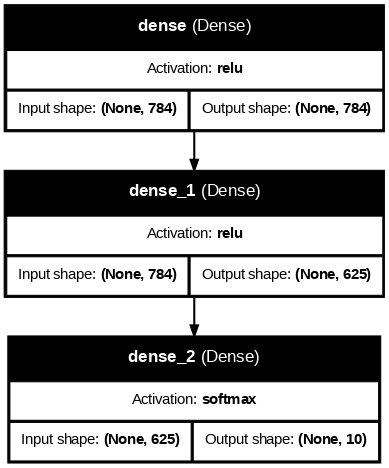

In [35]:
plot_model(model,dpi=75,show_shapes=True,show_layer_names=True,show_layer_activations=True)

# **Model Train**

In [77]:
# Train
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.2429 - loss: 2.2411
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.6557 - loss: 1.8579
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.7519 - loss: 1.5085
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.7930 - loss: 1.1938
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.8184 - loss: 0.9708
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.8354 - loss: 0.8197
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8462 - loss: 0.7146
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8544 - loss: 0.6483
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8633 - loss: 0.5872
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.8668 - loss: 0.5499


How many times we want to run iteration - epochs

# **Inference on Test Data**

In [84]:
# Evaluate
evaluation = model.evaluate(X_test, Y_test)

# Display test statistics
print("Summary: Loss over the test dataset: %.2f, Accuracy: %.2f" % (evaluation[0]*100, evaluation[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8620 - loss: 0.5637
Summary: Loss over the test dataset: 50.06, Accuracy: 88.05


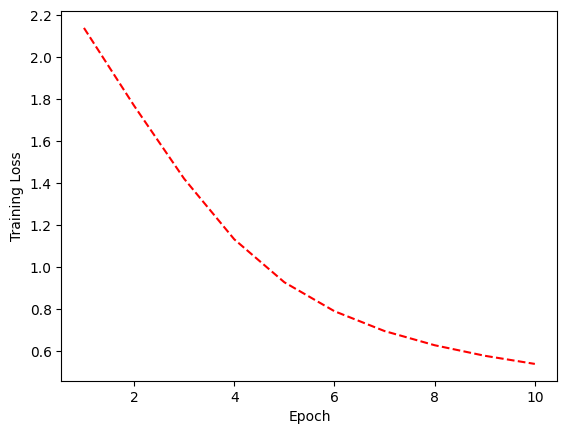

In [85]:
# Get training loss history
training_loss = history.history['loss']

#Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()

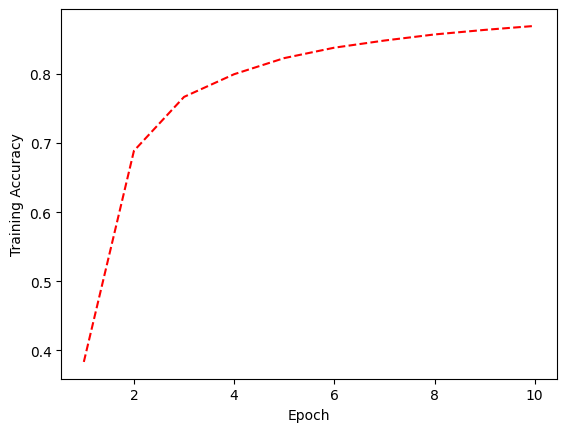

In [86]:
# Get training accuracy history
training_accuracy = history.history['accuracy']

#Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.show()